<a href="https://colab.research.google.com/github/HenShenhav/openpiv-python/blob/master/read_dicom_animatplot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# read DICOM using pydicom

In [ ]:
!pip install pydicom
!pip install git+https://github.com/openpiv/openpiv-python --upgrade
!pip install opencv-python-headless
!pip install git+https://github.com/alexlib/pivpy
!pip install animatplot


In [3]:
from pydicom import dcmread
from pylab import *
import numpy as np
import matplotlib.pyplot as plt
from openpiv import windef
import imageio
import os
import animatplot as amp

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
ds = dcmread('/content/drive/Shareddrives/echo_piv/repo/data/IM_0001')

In [6]:
arr = ds.pixel_array
image1=arr[0,...]
image1=image1[180:480,270:500,0]

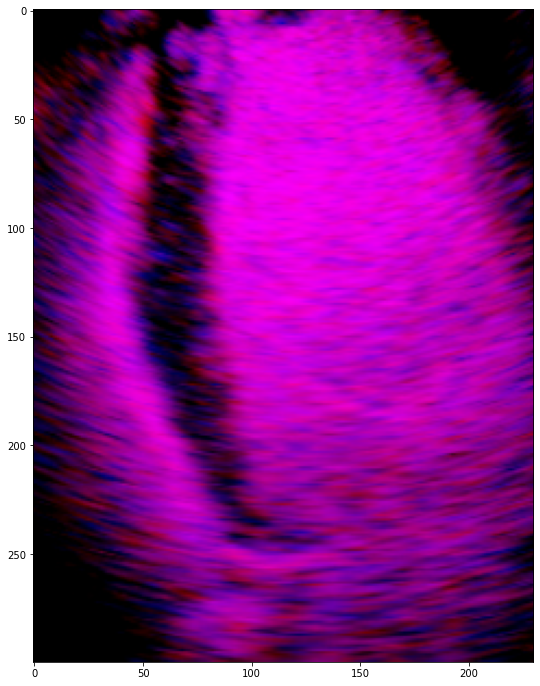

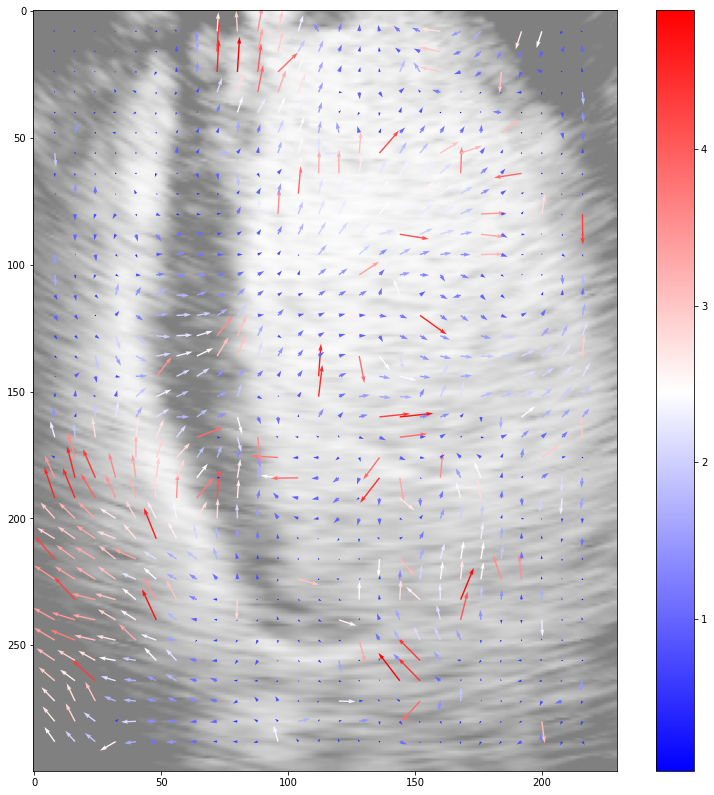

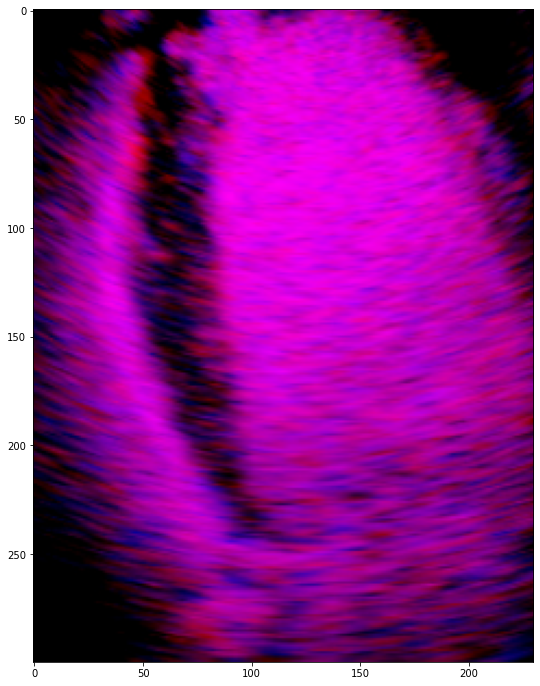

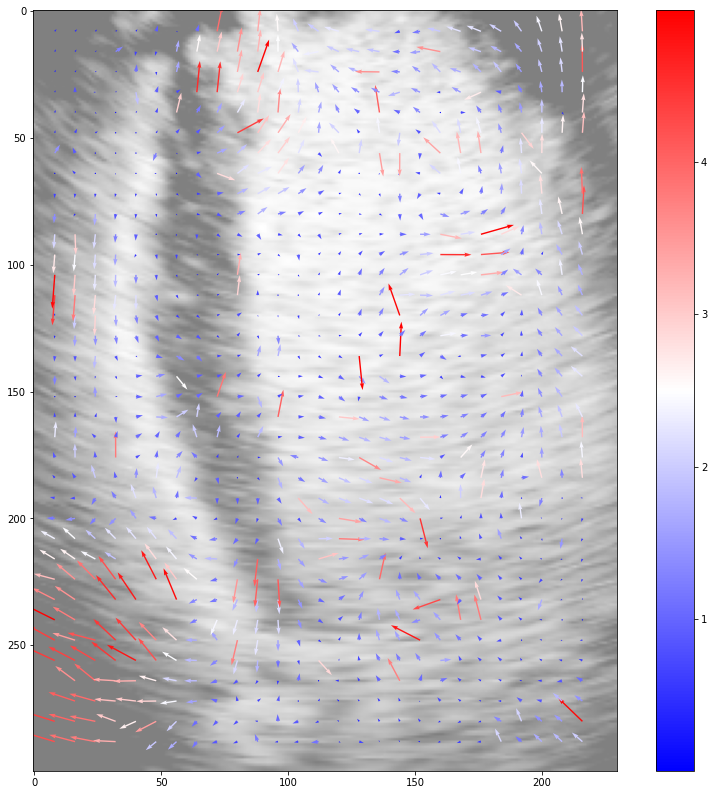

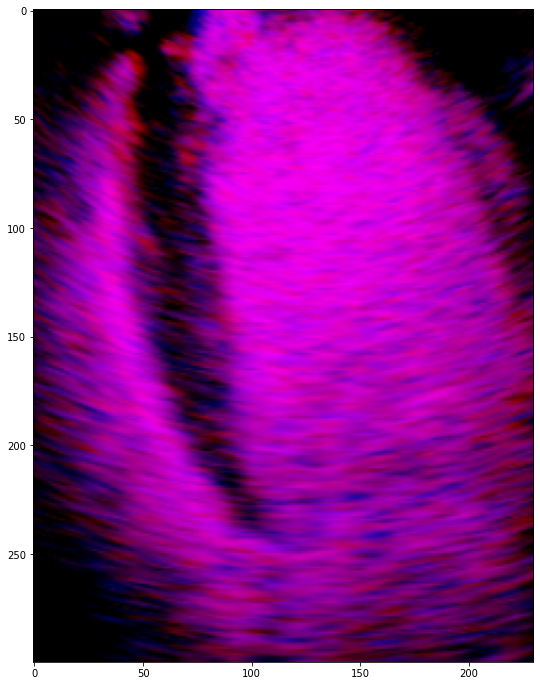

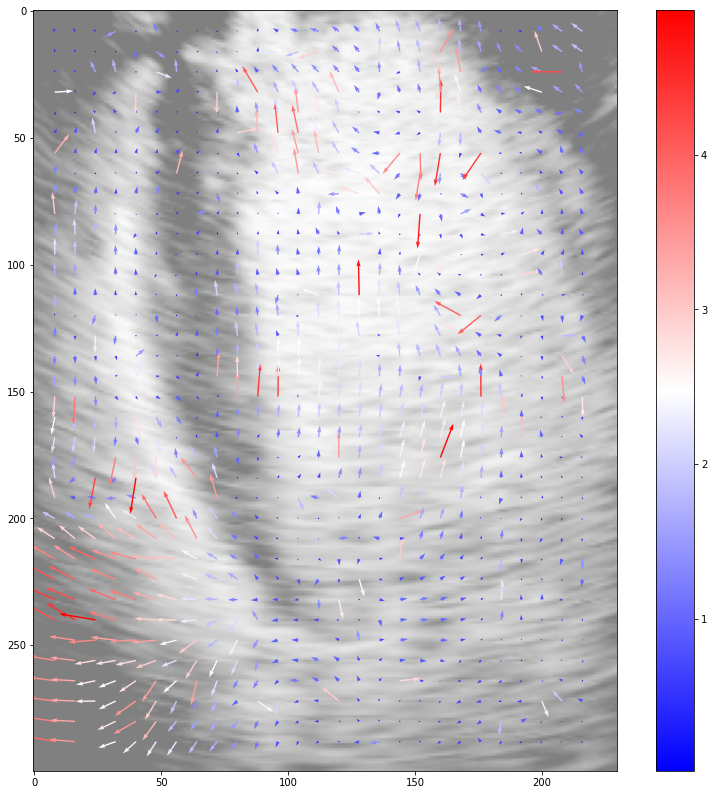

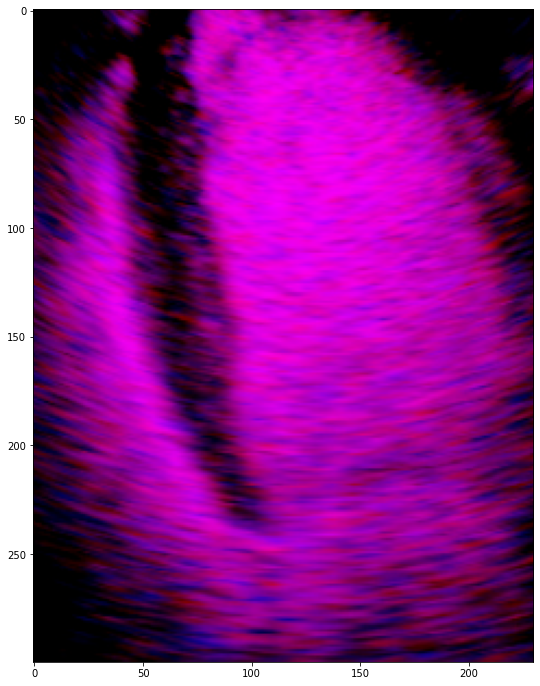

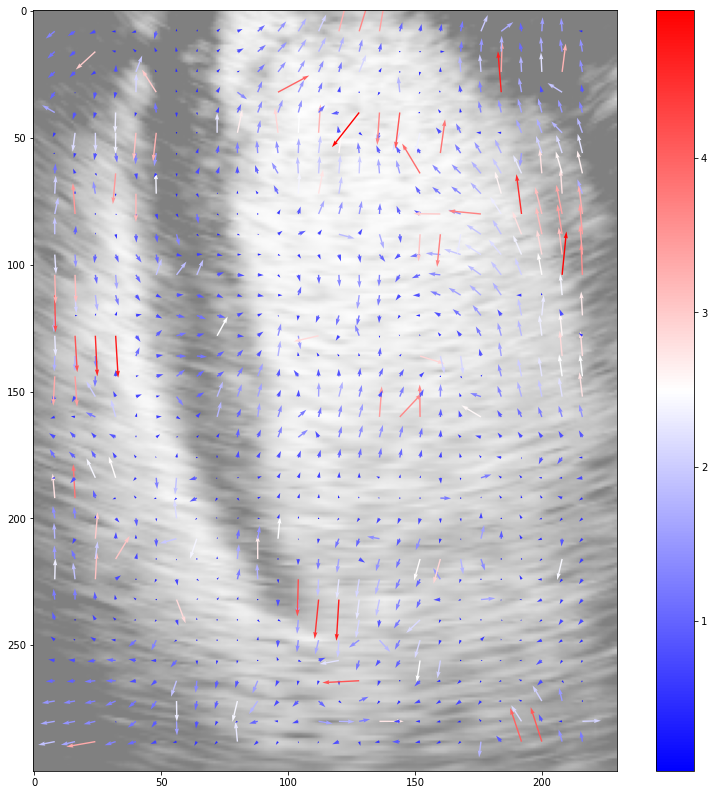

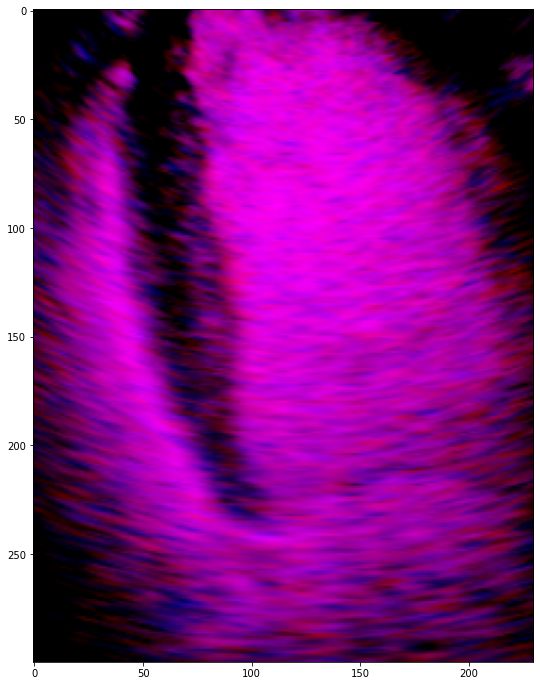

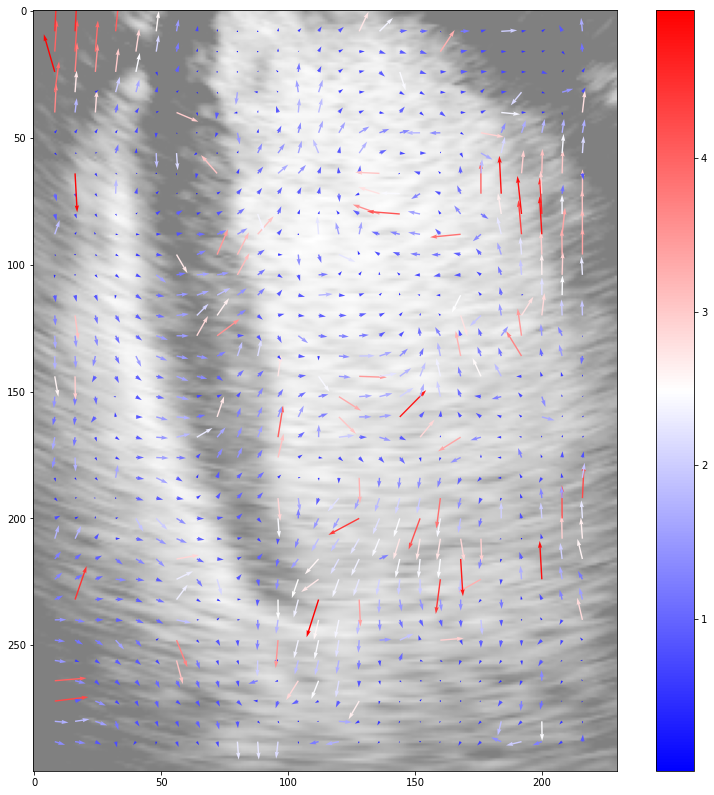

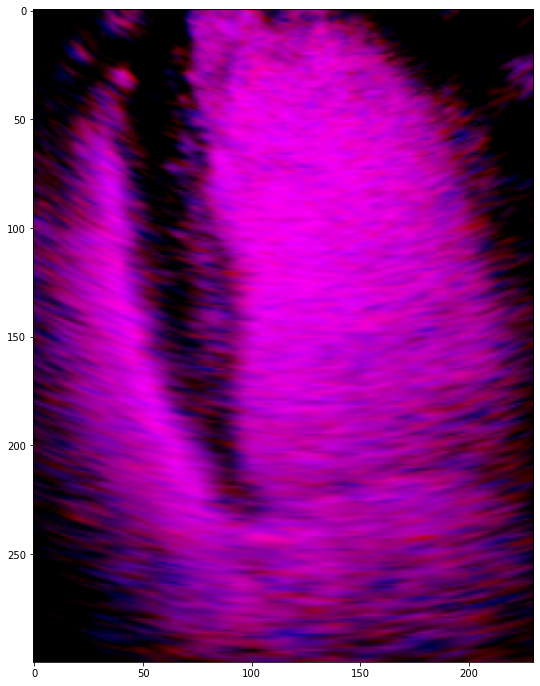

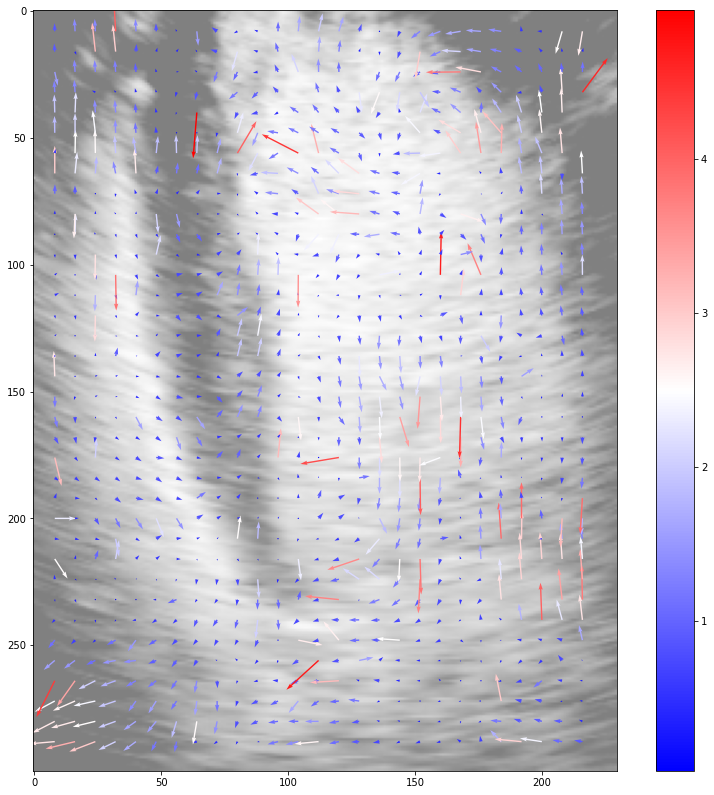

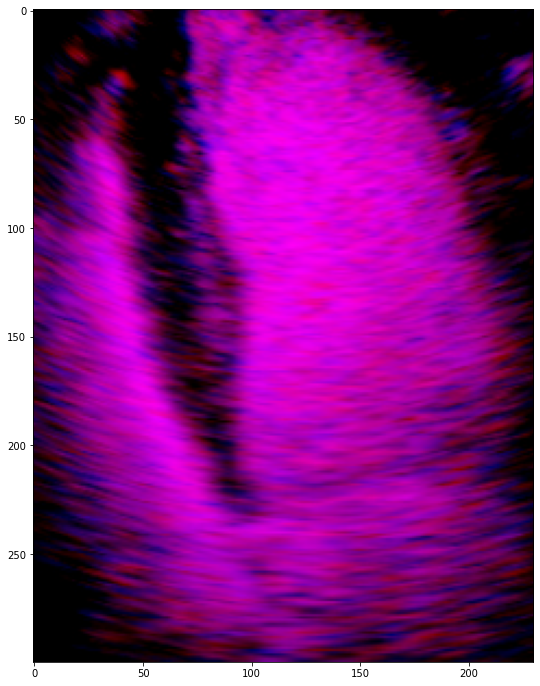

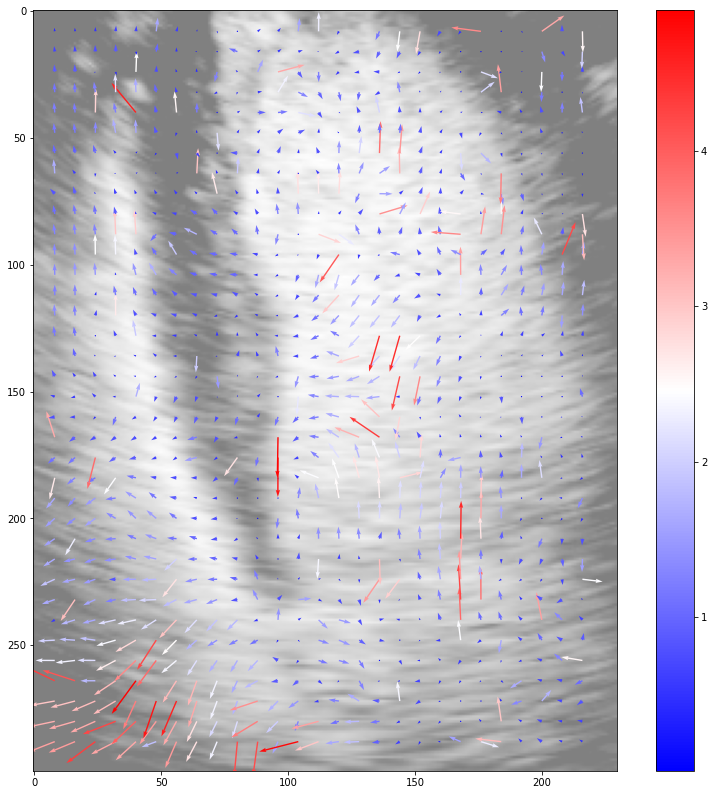

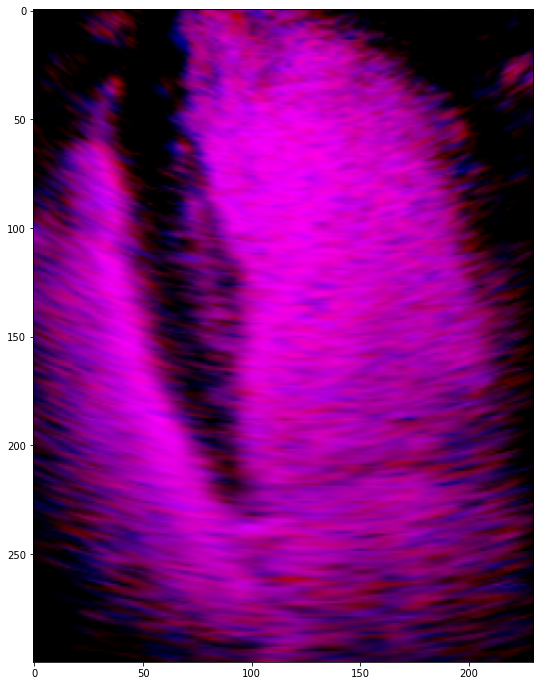

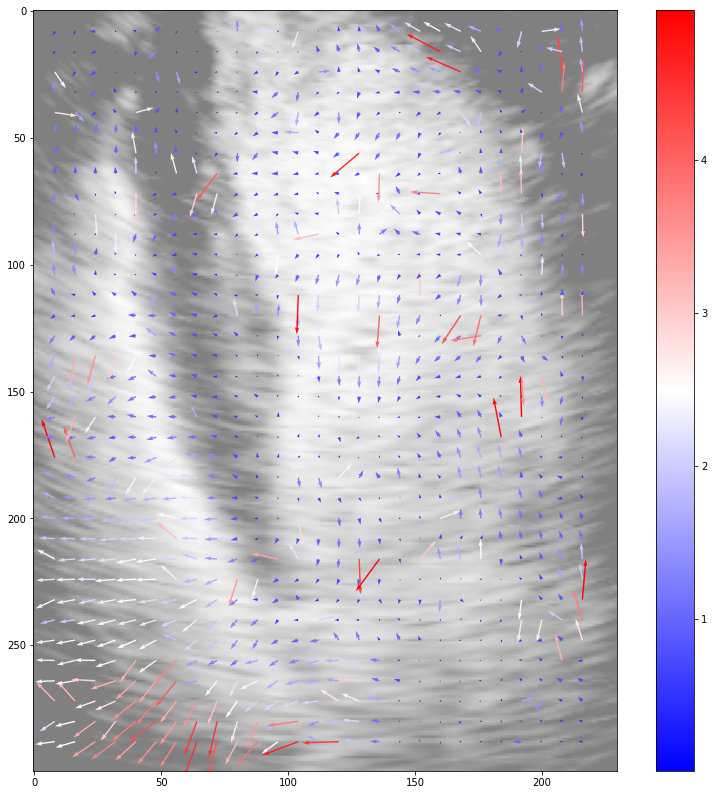

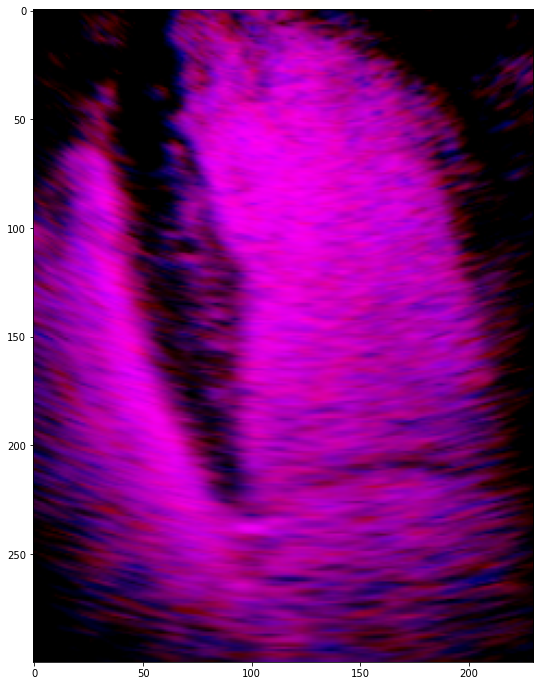

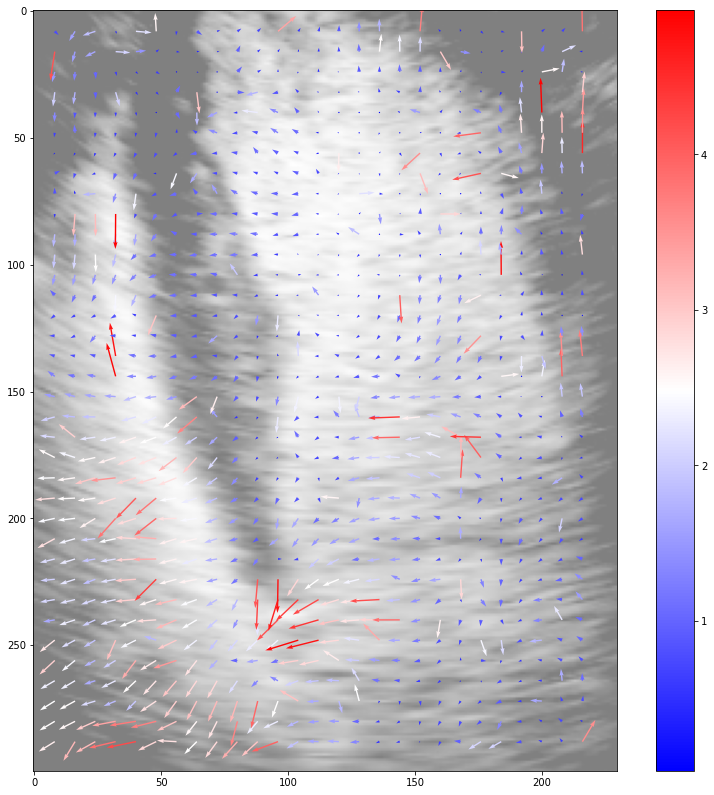

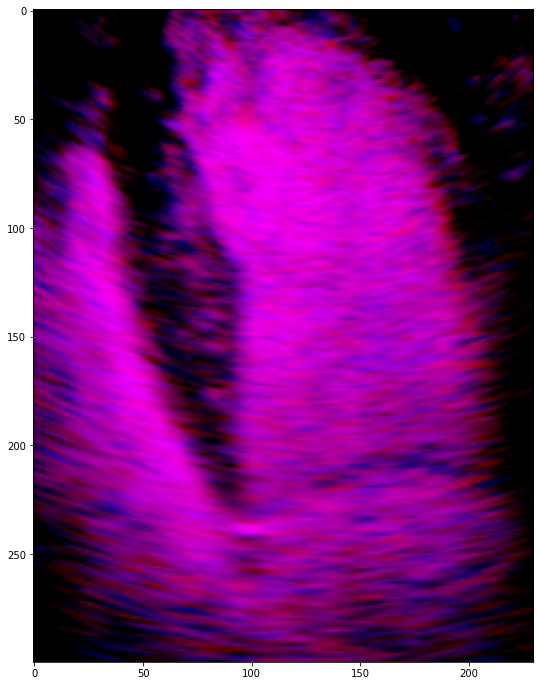

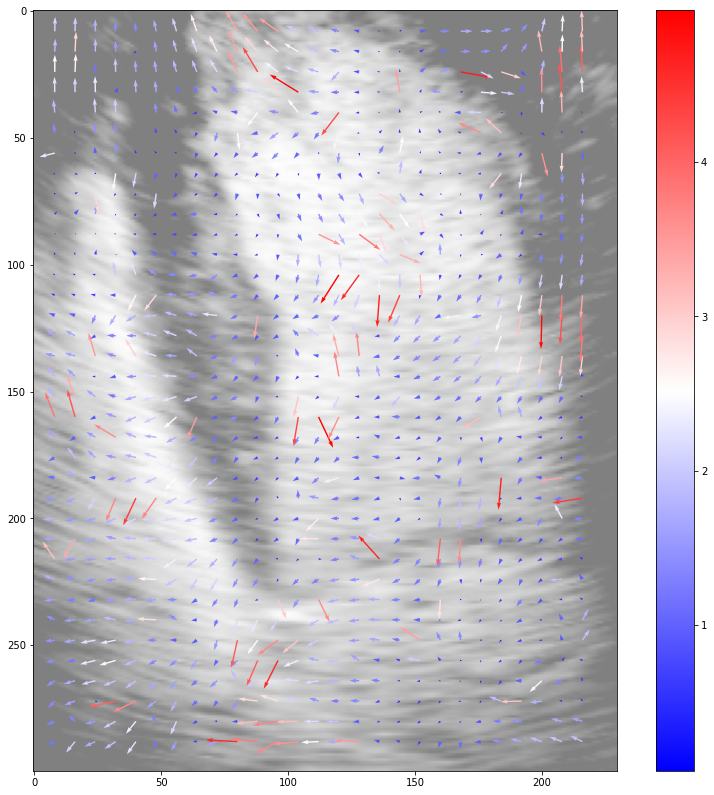

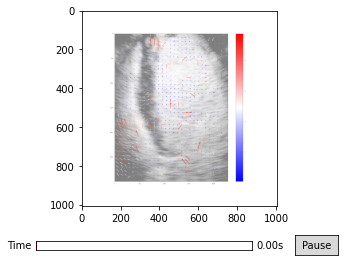

In [7]:
count = 0
frames=[]

while count < 10:
    image2 = arr[count+1,...]
    image2=image2[180:480,270:500,0]
    %matplotlib inline
    fig, ax = plt.subplots(figsize=(12,12))
    ax.imshow(np.stack([image1,0*image1, image2],axis=2))
    x,y,u,v,s2n = windef.simple_multipass(image1, image2, windows=(64,64,32,16))
    valid = np.sqrt(u**2 + v**2) < 5
    fig, ax = plt.subplots(figsize=(14,14))
    im=ax.imshow(image1, cmap='gray', alpha=.5)
    cm = ax.quiver(x[valid],y[valid],u[valid],v[valid], np.sqrt(u[valid]**2+v[valid]**2), cmap='bwr')
    plt.colorbar(cm, orientation='vertical')
    plt.show()
    fig.canvas.draw()
    rgba_buf = fig.canvas.buffer_rgba()
    (w,h) = fig.canvas.get_width_height()
    rgba_arr = np.frombuffer(rgba_buf, dtype=np.uint8).reshape((h,w,4))
    frames.append(rgba_arr)

    count += 1 
    image1 = image2.copy() 

block = amp.blocks.Imshow(frames)
t = np.linspace(0, 1, 10)
timeline = amp.Timeline(t,units='s', fps=2)
anim = amp.Animation([block], timeline)
anim.controls()
anim.save_gif('/content/drive/Shareddrives/echo_piv/repo/data/animation_dicom')